## Analysis Outline - Index of Economic Freedom

#### The analysis aims to explore the following hypothesis: "The higher the Government Integrity, the higher is the Judicial Effectiveness". It is expected to have a strong positive relationship between Government Integrity and Judicial Effectiveness.


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## Shortening folder path

In [3]:
# Setting up short folder

path = r'/Volumes/GoogleDrive/My Drive/Career Foundry/2 Data Immersion/Achievement 6 - Advanced Analytics/Task 6.4'

In [4]:
path

'/Volumes/GoogleDrive/My Drive/Career Foundry/2 Data Immersion/Achievement 6 - Advanced Analytics/Task 6.4'

## Importing dataset

In [5]:
# Importing dataset

df_economic_freedom = pd.read_csv(os.path.join(path, 'economic_freedom.csv'))

## Exploring dataset

In [6]:
# Counting rows and columns

df_economic_freedom.shape

(5152, 19)

In [7]:
# Showing columns

df_economic_freedom.columns

Index(['Unnamed: 0', 'Region', 'Country', 'Latitude', 'Longitude',
       'Index Year', 'Overall Score', 'Property Rights',
       'Government Integrity', 'Judicial Effectiveness', 'Tax Burden',
       'Government Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom'],
      dtype='object')

In [8]:
# Showing the columns with the first 5 rows of data

df_economic_freedom.head()

,Unnamed: 0,Region,Country,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,0,Americas,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0
1,1,Americas,Barbados,13.193887,-59.543198,2022,71.3,72.6,68.7,88.2,80.6,70.8,79.7,64.7,63.4,78.6,58.4,70.0,60.0
2,2,Americas,Belize,17.189877,-88.497650,2022,56.6,34.7,38.1,70.2,77.0,64.1,37.6,54.0,59.9,82.5,55.6,55.0,50.0
3,3,Americas,Bolivia,-16.290154,-63.588653,2022,43.0,14.1,28.7,28.4,86.0,58.8,10.9,54.7,46.2,72.8,60.8,15.0,40.0
4,4,Americas,Brazil,-14.235004,-51.925280,2022,53.3,50.3,40.0,57.2,69.9,53.8,0.4,63.2,55.9,78.4,60.0,60.0,50.0


In [9]:
# Checking the columns formats

df_economic_freedom.dtypes

Unnamed: 0                  int64
Region                     object
Country                    object
Latitude                  float64
Longitude                 float64
Index Year                  int64
Overall Score             float64
Property Rights           float64
Government Integrity      float64
Judicial Effectiveness    float64
Tax Burden                float64
Government Spending       float64
Fiscal Health             float64
Business Freedom          float64
Labor Freedom             float64
Monetary Freedom          float64
Trade Freedom             float64
Investment Freedom        float64
Financial Freedom         float64
dtype: object

In [10]:
# Checking missing values

df_economic_freedom.isnull().sum()

Unnamed: 0                   0
Region                       0
Country                      0
Latitude                     0
Longitude                    0
Index Year                   0
Overall Score                0
Property Rights              0
Government Integrity         0
Judicial Effectiveness    4053
Tax Burden                 518
Government Spending        502
Fiscal Health             4060
Business Freedom           485
Labor Freedom             1979
Monetary Freedom           496
Trade Freedom              511
Investment Freedom         496
Financial Freedom          518
dtype: int64

## Cleaning data

In [11]:
# Adding median values to "Judicial Effectiveness" 

df_economic_freedom['Judicial Effectiveness'].fillna(df_economic_freedom['Judicial Effectiveness'].median(), inplace=True)


In [12]:
# Checking Judicial Effectiveness column

df_economic_freedom.isnull().sum()

Unnamed: 0                   0
Region                       0
Country                      0
Latitude                     0
Longitude                    0
Index Year                   0
Overall Score                0
Property Rights              0
Government Integrity         0
Judicial Effectiveness       0
Tax Burden                 518
Government Spending        502
Fiscal Health             4060
Business Freedom           485
Labor Freedom             1979
Monetary Freedom           496
Trade Freedom              511
Investment Freedom         496
Financial Freedom          518
dtype: int64

In [13]:
# Dropping the index column

df_economic_freedom.drop(df_economic_freedom.columns[0], axis=1, inplace =True)

In [14]:
df_economic_freedom.head()

,Region,Country,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Americas,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0
1,Americas,Barbados,13.193887,-59.543198,2022,71.3,72.6,68.7,88.2,80.6,70.8,79.7,64.7,63.4,78.6,58.4,70.0,60.0
2,Americas,Belize,17.189877,-88.497650,2022,56.6,34.7,38.1,70.2,77.0,64.1,37.6,54.0,59.9,82.5,55.6,55.0,50.0
3,Americas,Bolivia,-16.290154,-63.588653,2022,43.0,14.1,28.7,28.4,86.0,58.8,10.9,54.7,46.2,72.8,60.8,15.0,40.0
4,Americas,Brazil,-14.235004,-51.925280,2022,53.3,50.3,40.0,57.2,69.9,53.8,0.4,63.2,55.9,78.4,60.0,60.0,50.0


## Checking extreme values

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Government Integrity', ylabel='Density'>

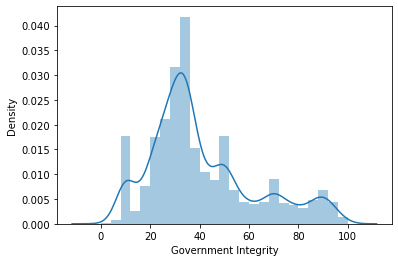

In [15]:
# Checking for extreme values in "Government Integrity"

sns.distplot(df_economic_freedom['Government Integrity'], bins=25)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Judicial Effectiveness', ylabel='Density'>

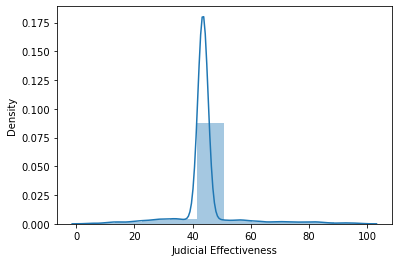

In [16]:
# Checking for extreme values in "Judicial Effectiveness"

sns.distplot(df_economic_freedom['Judicial Effectiveness'], bins=10)

## Describing key variables

In [17]:
# Checking the mean, median and max values

df_economic_freedom[['Government Integrity', 'Judicial Effectiveness']].describe()

,Government Integrity,Judicial Effectiveness
count,5152.000000,5152.000000
mean,40.533443,44.156929
std,21.370128,9.734983
min,0.000000,3.900000
25%,27.000000,43.600000
50%,34.600000,43.600000
75%,50.000000,43.600000
max,100.000000,98.000000


## Preparing data for regression analysis

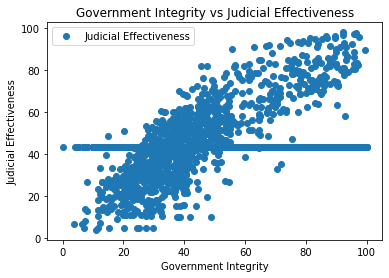

In [18]:
# Creating a scatterplot to looking for variables' relationship to be tested
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_economic_freedom.plot(x = 'Government Integrity', y='Judicial Effectiveness',style='o')
plt.title('Government Integrity vs Judicial Effectiveness')  
plt.xlabel('Government Integrity')  
plt.ylabel('Judicial Effectiveness')  
plt.show()


Noted a strong positive relationship between the two variables.

## Reshaping the variables

In [19]:
# Reshaping the variables into NumPy arrays and putting them into separate objects

X = df_economic_freedom['Government Integrity'].values.reshape(-1,1)
y = df_economic_freedom['Judicial Effectiveness'].values.reshape(-1,1)

In [20]:
X

array([[45.1],
       [68.7],
       [38.1],
       ...,
       [30. ],
       [30. ],
       [30. ]])

In [21]:
y

array([[57.9],
       [88.2],
       [70.2],
       ...,
       [43.6],
       [43.6],
       [43.6]])

In [22]:
# Splitting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [23]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train) # training the model

LinearRegression()

In [25]:
# Predict the values of y using X.
# Using the model on the test data set to predict some y values and see how accurate they are.

y_predicted = regression.predict(X_test) 

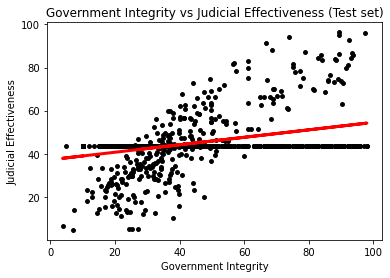

In [26]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Government Integrity vs Judicial Effectiveness (Test set)')
plot_test.xlabel('Government Integrity')
plot_test.ylabel('Judicial Effectiveness')
plot_test.show()

In [27]:
# Checking the accuracy of the model - mean squared error and R2.
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Printing the model's summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17348444]]
Mean squared error:  75.01087326934079
R2 score:  0.1393162745874318


The **slope coefficient** indicates how the y variable changes when X changes. 

The **root mean squared error (MSE)** is an estimator that measures the average of the squared difference between the estimated values and the true values. It states how close a regression line is to a set of points. A small MSE means that the regression line passes fairly close to the observations, making it a good fit. I would interpret the result moderate to high MSE, so **the linear regression line is not a fairly good fit** for this analysis.

The **R2 score** or R squared is a metric that shows how well the model explains the variance in the data. It’s a number between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. I would interpret the result as **the fit is weak**.

In [29]:
# Making a dataframe of y values and their predicted values to further see the performance of the model 

y_predicted

array([[41.93488174],
       [43.09722751],
       [53.21137054],
       ...,
       [42.40328974],
       [38.93360088],
       [38.93360088]])

In [30]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.0,41.934882
1,43.6,43.097228
2,81.2,53.211371
3,43.6,43.444196
4,43.6,42.403290
5,43.6,42.403290
6,43.6,45.699494
7,46.4,46.081160
8,43.6,42.056321
9,43.6,45.872979


This output shows there is some differences between the actual and predicted values. 

This evidence that the model does not explain with a high level of accuracy the relationship between the “Government Integrity' and the 'Judicial Effectiveness” variables. 

The relationship doesn’t follow a straight regression line, perhaps further analysis should be indicated to analyse 
outliers or other variables.**

In [31]:
# Comparing how the regression fits the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
# Checking the accuracy of the model.

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
# Printing the model's statistics results. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.17348444]]
Mean squared error:  84.0977528548612
R2 score:  0.1416105566544088


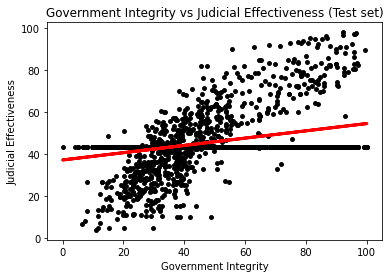

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='black', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Government Integrity vs Judicial Effectiveness (Test set)')
plot_test.xlabel('Government Integrity')
plot_test.ylabel('Judicial Effectiveness')
plot_test.show()


### 06. Performance improvement after removing outliers?

In [35]:
# Cleaning the extreme values from the "Government Integrity" variable observed during the consistency checks.

df_test = df_economic_freedom[df_economic_freedom['Government Integrity'] <=80] 

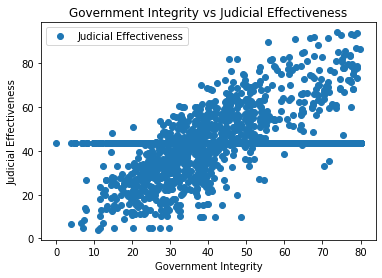

In [36]:
# Checking how the scatterplot looks without the outliers.

df_test.plot(x = 'Government Integrity', y='Judicial Effectiveness', style='o')  
plt.title('Government Integrity vs Judicial Effectiveness')  
plt.xlabel('Government Integrity')  
plt.ylabel('Judicial Effectiveness')  
plt.show()


In [37]:
# Reshape again.

X_2 = df_test['Government Integrity'].values.reshape(-1,1)
y_2 = df_test['Judicial Effectiveness'].values.reshape(-1,1)

In [38]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [39]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [40]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [41]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17241886]]
Mean squared error:  64.50493205901782
R2 score:  0.11433754071991631


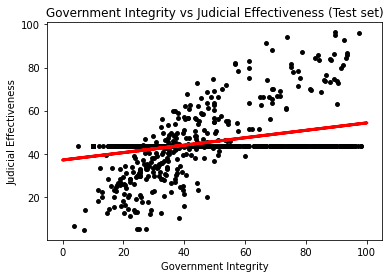

In [43]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Government Integrity vs Judicial Effectiveness (Test set)')
plot_test.xlabel('Government Integrity')
plot_test.ylabel('Judicial Effectiveness')
plot_test.show()


In [44]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})


In [45]:
data.head(30)

,Actual,Predicted
0,43.6,43.444763
1,43.6,44.479276
2,43.6,46.375883
3,43.6,40.341223
4,66.2,48.203523
5,72.7,49.082860
6,43.6,42.237831
7,43.6,43.030957
8,43.6,42.927506
9,43.6,42.237831


There are some observation with high difference between the actual and predicted values, but there are others with close values. Although the scatterplot shows a good correlation between the variables, the model's statistics results show that the linear regression model doesn't seem to be a good fit.